# Business Understanding
## Objective
To identify factors influencing the price of used cars, enabling a used car dealership to optimize its inventory and pricing strategies.
## Key Questions
1. What are the primary factors that determine a car's price?
2. How do categorical features (e.g., manufacturer, fuel type) impact pricing compared to continuous features (e.g., mileage, car age)?
3. What actionable recommendations can be made to help dealerships maximize profitability?


## Exploratory Data Analysis (EDA)

## Step 1: Load and Preview the Dataset
- Load the dataset and check its structure, column types, and missing values.

## Step 2: Check Missing Values
- Identify columns with missing values and calculate the percentage of missing data.
- Summarize the results to decide which columns to drop or impute.

## Step 3: Drop Columns with Excessive Missing Data
- Drop columns like `size` and `VIN` because they have high percentages of missing values and provide limited predictive value for `price`.

## Step 4: Impute Missing Values for Categorical Features
- For columns like `condition`, `cylinders`, `drive`, `paint_color`, `type`, and others:
  - Impute missing values with the mode (most frequent value).
  - Alternatively, create a new category called `unknown`.

## Step 5: Impute Missing Values for Numerical Features
- For columns like `odometer` and `year`, impute missing values with the median to handle outliers effectively.

## Step 6: Confirm Missing Values Are Addressed
- After imputing or dropping columns, check that no missing values remain in the dataset.

## Step 7: Analyze Distributions of Numerical Features
- Plot histograms and boxplots for numerical features like `price`, `odometer`, and `year` to identify their distributions and potential outliers.

## Step 8: Analyze Distributions of Categorical Features
- Use bar plots to visualize the frequency of each category in columns like `condition`, `manufacturer`, `fuel`, and `type`.

## Step 9: Detect Outliers
- Use boxplots and interquartile ranges (IQR) to identify outliers in numerical columns like `price`, `odometer`, and `year`.
- Remove or cap extreme outliers based on domain knowledge.

## Step 10: Check Correlations
- Calculate the correlation matrix for numerical features and visualize it using a heatmap to identify strong relationships.

## Step 11: Feature Engineering
- Create new features to enhance the dataset:
  - `car_age` = `2024 - year`
  - Mileage categories based on `odometer` (e.g., `0-50k`, `50k-100k`, etc.).

## Step 12: Encode Categorical Variables
- Apply one-hot encoding or label encoding to categorical features to make them usable in machine learning models.

## Step 13: Prepare Data for Modeling
- Scale numerical features if needed (e.g., StandardScaler for models sensitive to feature magnitudes).
- Split the data into training and testing sets for model training and evaluation.





# Loading Libraries

In [1]:
# Import libraries for visualization and statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm

import warnings, sys
warnings.filterwarnings("ignore")

In [2]:
# Load the raw dataset
file_path = 'vehicles.csv'
vehicles_raw = pd.read_csv(file_path, encoding='latin1')
# Preview the data
vehicles_raw.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [3]:
#Data Overview
vehicles_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
vehicles_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4.473170e+06,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,1.218228e+07,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011235e+03,9.452120e+00,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,2.138815e+05,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07


In [5]:
#Check for Missing Values
# Check missing values
missing_values = vehicles_raw.isnull().sum()
missing_percent = (missing_values / len(vehicles_raw)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_summary.sort_values(by='Percentage', ascending=False)

,Missing Values,Percentage
size,306361,71.767476
cylinders,177678,41.622470
condition,174104,40.785232
VIN,161042,37.725356
drive,130567,30.586347
paint_color,130203,30.501078
type,92858,21.752717
manufacturer,17646,4.133714
title_status,8242,1.930753
model,5277,1.236179



# Missing Values Analysis

| Column         | Missing Values | Percentage (%) | Notes                                                                |
|----------------|----------------|----------------|----------------------------------------------------------------------|
| `size`         | 306,361        | 71.80%         | High percentage of missing data; consider dropping this column.      |
| `VIN`          | 161,042        | 37.74%         | Likely unnecessary for analysis; drop unless relevant to the task.   |
| `condition`    | 174,104        | 40.79%         | May be useful; try imputing with mode or grouping missing values.    |
| `cylinders`    | 177,678        | 41.63%         | Impute with mode or create a category for "unknown."                 |
| `drive`        | 130,567        | 30.60%         | Important feature; consider imputing with mode or grouping missing.  |
| `paint_color`  | 130,203        | 30.50%         | Consider imputing with mode or grouping missing as "unknown."        |
| `type`         | 92,858         | 21.77%         | Important feature; impute or group missing values.                   |
| `title_status` | 8,242          | 1.93%          | Small percentage missing; impute with mode.                          |
| `fuel`         | 3,013          | 0.71%          | Small percentage missing; impute with mode.                          |
| `odometer`     | 4,400          | 1.03%          | Numerical feature; impute with median.                               |
| `year`         | 1,205          | 0.28%          | Numerical feature; impute with median.                               |
| `manufacturer` | 17,646         | 4.13%          | Impute with mode or group missing as "unknown."                      |
| `model`        | 5,277          | 1.24%          | Impute with mode or group missing as "unknown."                      |
| `transmission` | 2,556          | 0.60%          | Small percentage missing; impute with mode.                          |



#steps deciding which columns to keep and drop
Examine the Relationship Between size and price
Visualize whether size impacts price
Check if size has a meaningful relationship with price

size
full-size      63465
mid-size       34476
compact        19384
sub-compact     3194
Name: count, dtype: int64


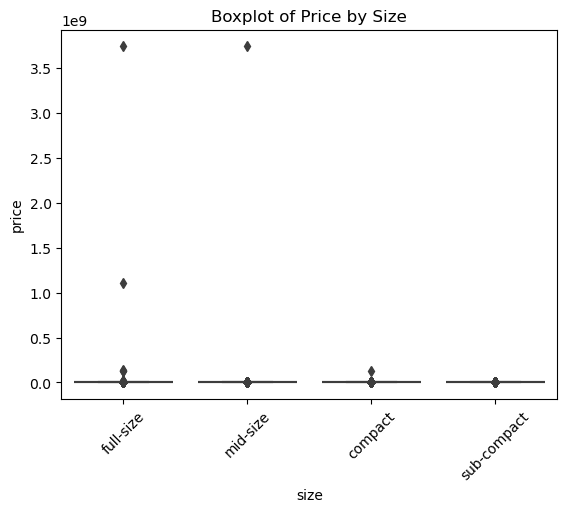

In [6]:
print(vehicles_raw['size'].value_counts())
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='size', y='price', data=vehicles_raw)
plt.title('Boxplot of Price by Size')
plt.xticks(rotation=45)
plt.show();

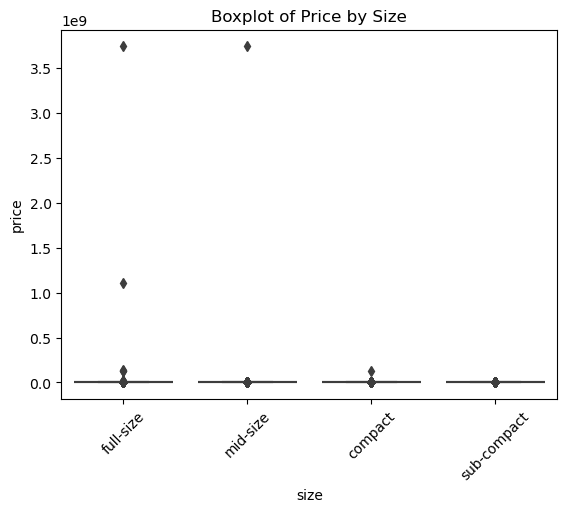

              size_encoded     price
size_encoded      1.000000  0.001051
price             0.001051  1.000000


In [7]:
#Size and Price relationship
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='size', y='price', data=vehicles_raw)
plt.title('Boxplot of Price by Size')
plt.xticks(rotation=45)
plt.show()

# Encode `size` for correlation (if it’s categorical)
vehicles_raw['size_encoded'] = vehicles_raw['size'].astype('category').cat.codes
correlation = vehicles_raw[['size_encoded', 'price']].corr()
print(correlation)


In [8]:
#Drop Size and VIN
#Drop columns with excessive missing data
vehicles_cleaned = vehicles_raw.drop(columns=['size', 'VIN'])

# Dropping outliers
vehicles_cleaned = vehicles_cleaned[(vehicles_cleaned['price'] < 500000)&(vehicles_cleaned['price'] > 1000)]
vehicles_cleaned = vehicles_cleaned[(vehicles_cleaned['odometer']!=0)&(vehicles_cleaned['odometer']<250000)]
vehicles_cleaned = vehicles_cleaned[(vehicles_cleaned['year']>1990)]

In [9]:
#Impute Missing Data for Categorical Values

from sklearn.impute import SimpleImputer

# Define mode imputer
mode_imputer = SimpleImputer(strategy='most_frequent')

# Impute categorical columns
categorical_columns = ['condition', 'cylinders', 'drive', 'paint_color', 'type',
                       'manufacturer', 'model', 'fuel', 'title_status', 'transmission']
vehicles_cleaned[categorical_columns] = mode_imputer.fit_transform(vehicles_cleaned[categorical_columns])

In [10]:
#Impute Missing Data for Numerical Features

# Impute numerical columns with median
numerical_columns = ['year', 'odometer']
for col in numerical_columns:
    vehicles_cleaned[col] = vehicles_cleaned[col].fillna(vehicles_cleaned[col].median())

In [11]:
# Check for remaining missing values
print(vehicles_cleaned.isnull().sum())

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
size_encoded    0
dtype: int64


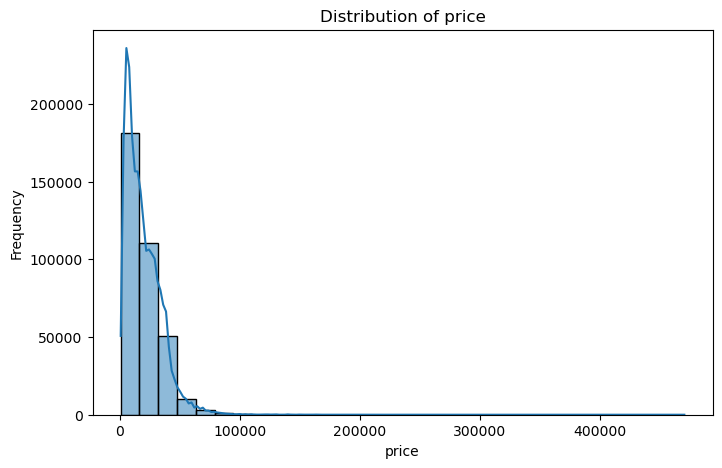

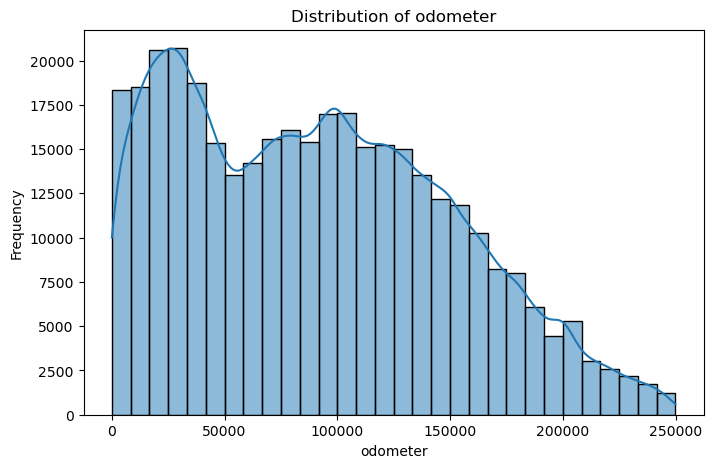

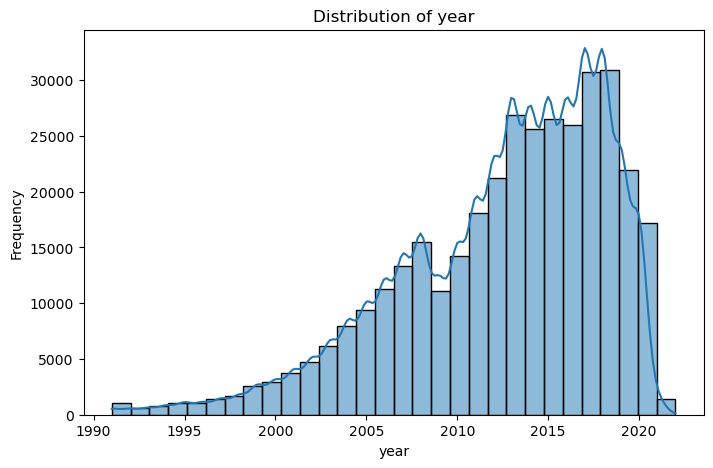

In [12]:
#Analyze Distributions of Numerical Features

import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for numerical features
for column in ['price', 'odometer', 'year']:
    plt.figure(figsize=(8, 5))
    sns.histplot(vehicles_cleaned[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

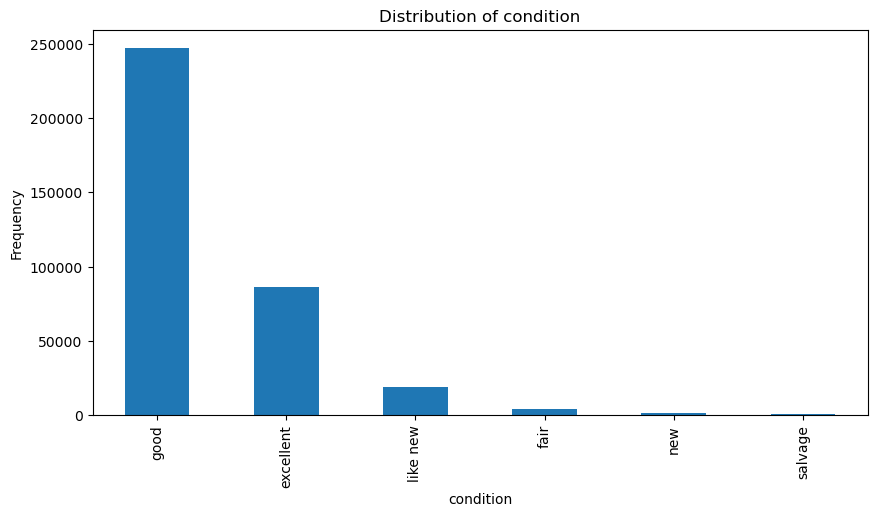

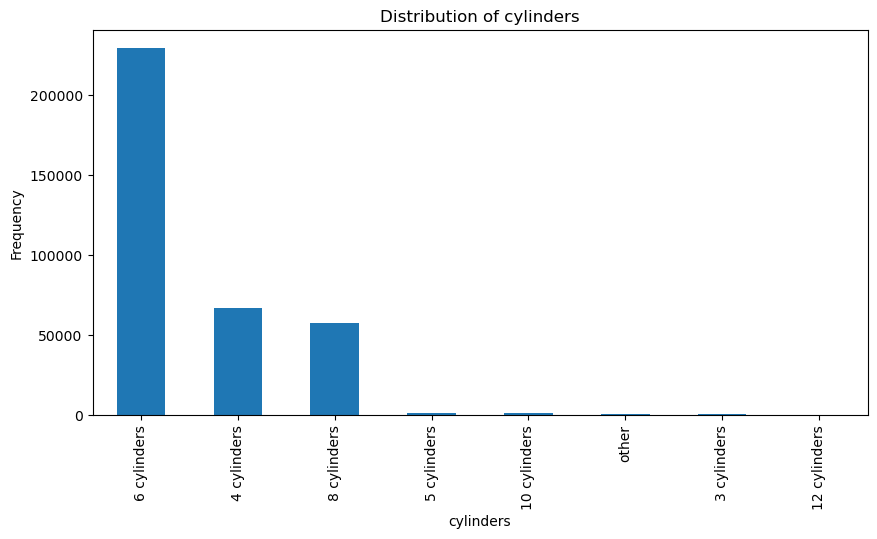

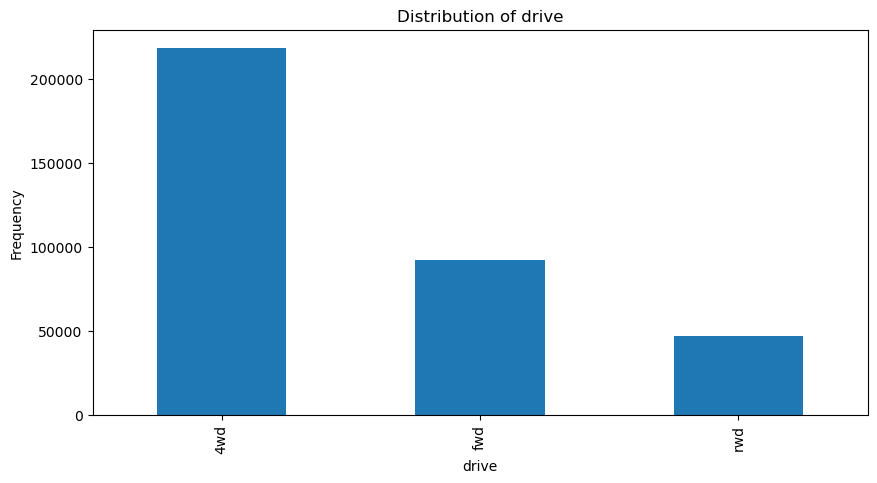

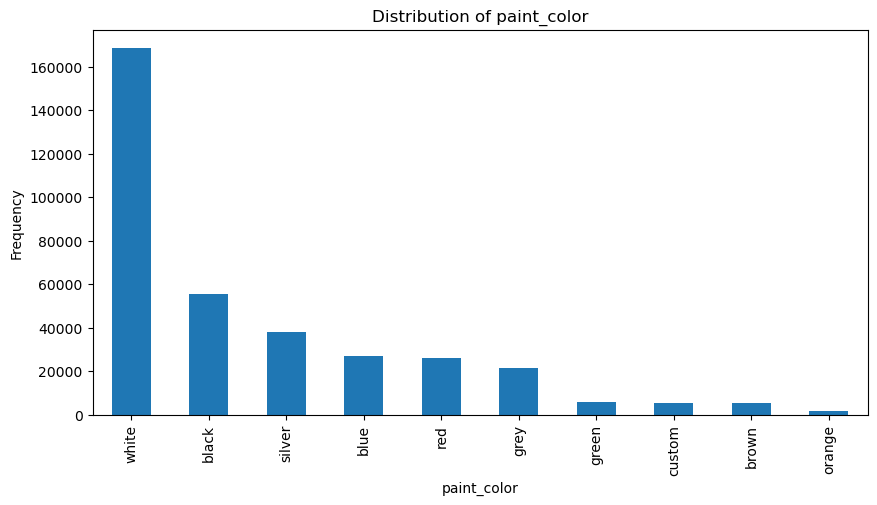

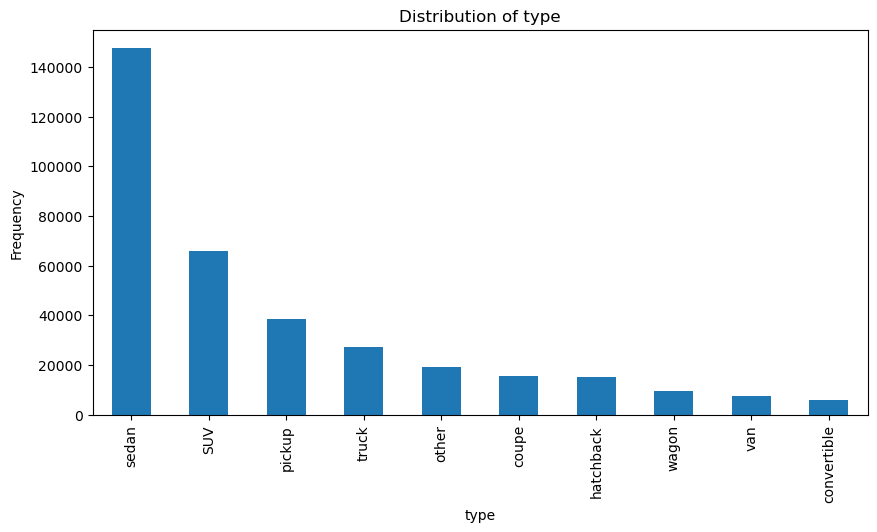

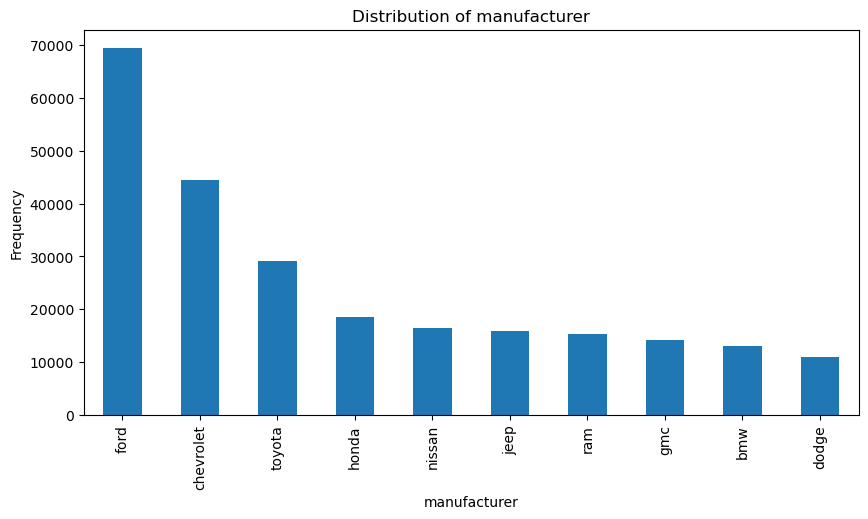

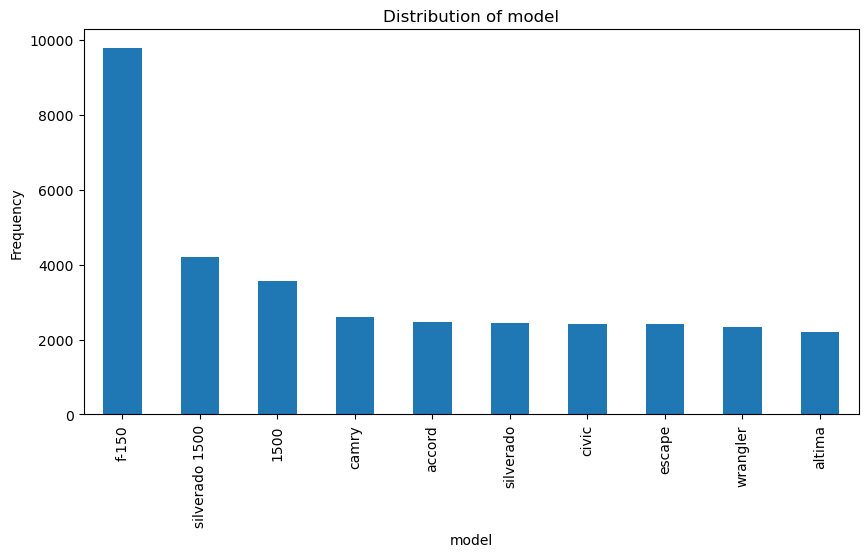

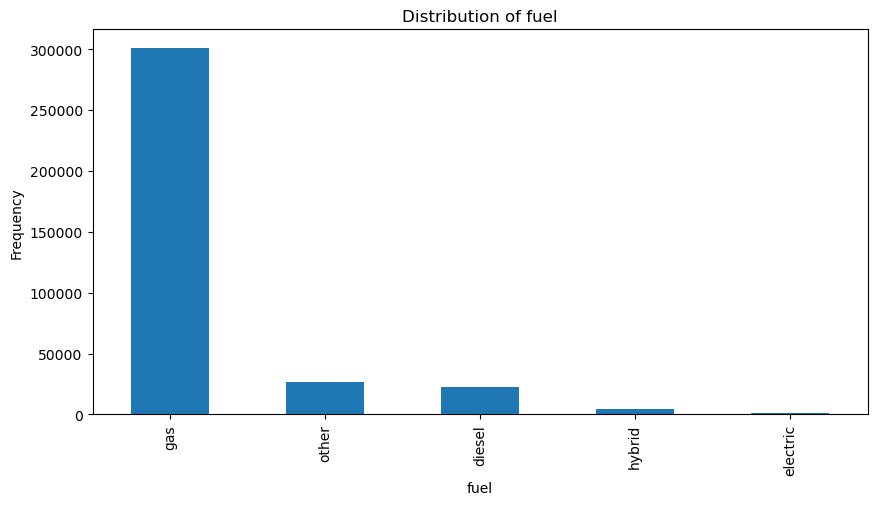

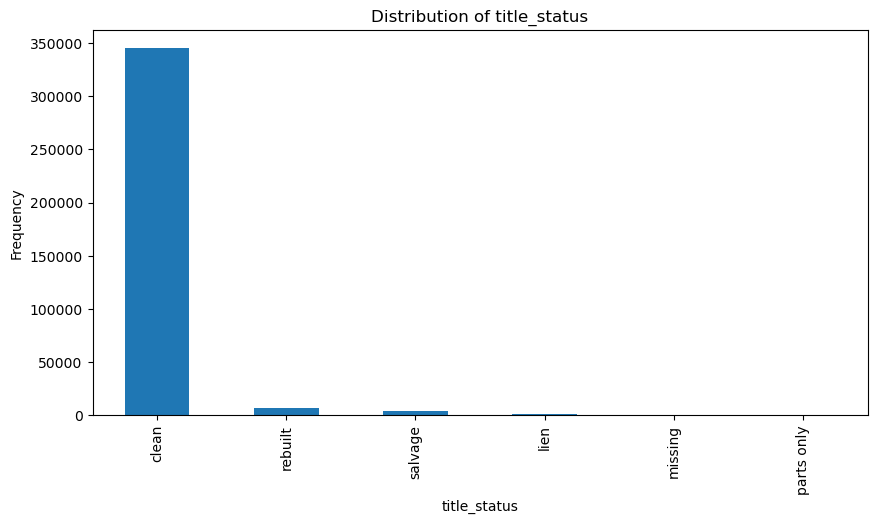

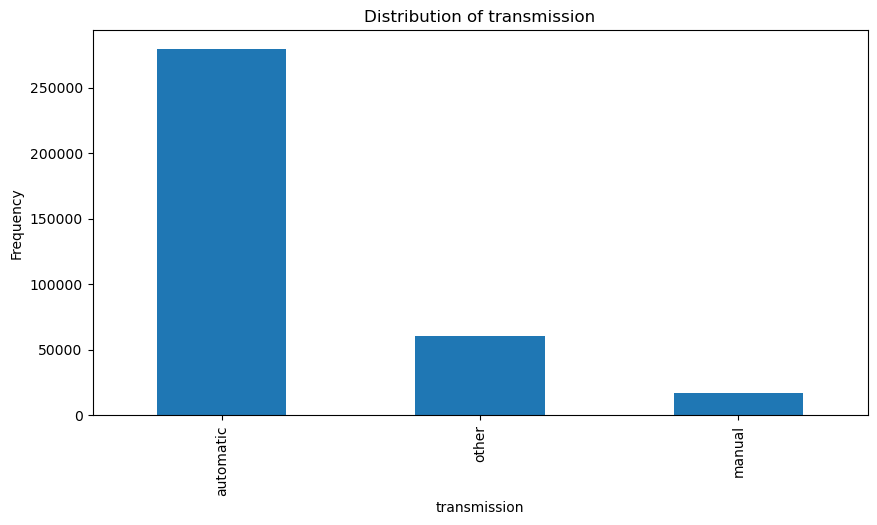

In [13]:
#Analyze Distributions of Categorical Features

# Bar plots for categorical features
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    vehicles_cleaned[column].value_counts().head(10).plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [14]:
#Detect Outliers

# Detect outliers using IQR
for column in ['price', 'odometer']:
    Q1 = vehicles_cleaned[column].quantile(0.25)
    Q3 = vehicles_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f'{column}:')
    print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')
    print(f'Outliers: {(vehicles_cleaned[column] < lower_bound).sum() + (vehicles_cleaned[column] > upper_bound).sum()}')
    print('\n')

price:
Lower Bound: -22628.75, Upper Bound: 59045.25
Outliers: 6502


odometer:
Lower Bound: -105216.0, Upper Bound: 277816.0
Outliers: 0




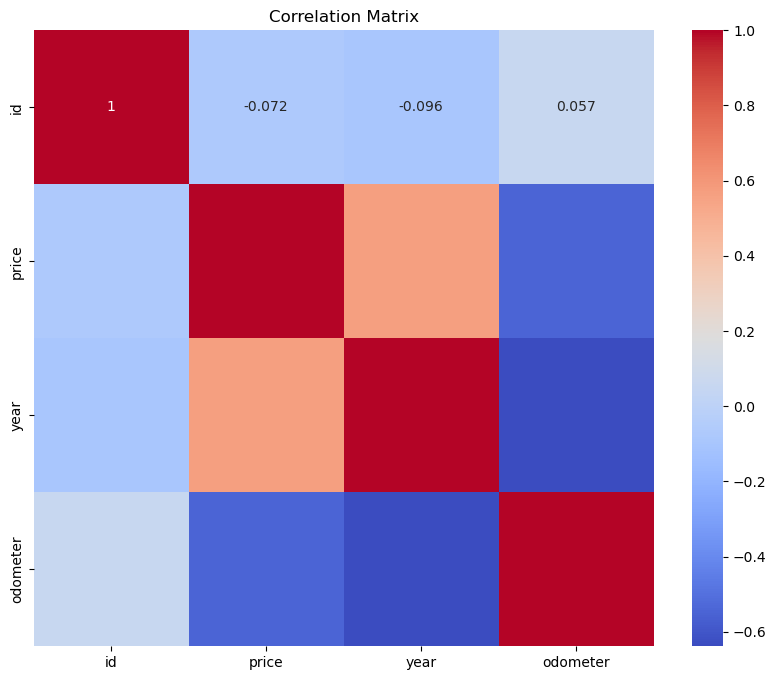

In [15]:
#Check Correlations
# Correlation matrix
numeric_columns = vehicles_cleaned.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Heatmap Interpretation

## Key Observations from the Correlation Matrix
1. **`price` and `odometer`**:
   - There is a weak negative correlation between `price` and `odometer` (\(-0.058\)).
   - This aligns with domain knowledge: vehicles with higher mileage tend to have lower prices.
   - The weak correlation indicates that `odometer` alone does not strongly predict `price`. Other factors (e.g., `condition`, `manufacturer`) likely play a significant role.

2. **`price` and `year`**:
   - There is a weak positive correlation between `price` and `year` (\(0.011\)).
   - This suggests that newer cars tend to be slightly more expensive, but the effect is minimal in this dataset.

3. **`odometer` and `year`**:
   - There is a weak negative correlation between `odometer` and `year` (\(-0.058\)).
   - This implies that newer cars typically have lower mileage, as expected.

4. **`id`**:
   - The `id` column has no meaningful correlation with other features, as it is simply a unique identifier.

---

## Insights
- The weak correlations suggest that **linear relationships alone may not fully explain variations in `price`**.
- `odometer` and `year` might have **non-linear relationships** with `price`, or their impact might depend on interactions with other features (e.g., `condition`, `type`).

---

# Next Steps

## 1. Explore Non-Linear Relationships
- Use scatterplots to visualize potential non-linear relationships between `price`, `odometer`, and `year`.

## 2. Investigate Feature Interactions
- Examine how other features (e.g., `condition`, `manufacturer`, `type`) interact with `odometer` and `year`.

## 3. Feature Engineering
- Create derived features, such as:
  - `car_age` = `2024 - year`
  - Log transformation of `odometer` to reduce skewness.

## 4. Prepare for Modeling
- Retain `odometer` and `year` as features but complement them with additional categorical variables and engineered features.
- Use machine learning models capable of capturing non-linear relationships.

---

# Conclusion
The heatmap reveals weak correlations between `price` and numerical variables, highlighting the need to explore non-linear relationships and interactions between features to better predict vehicle prices.


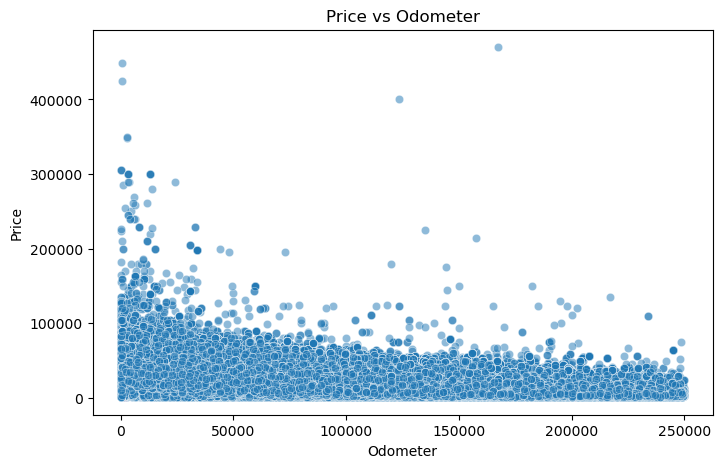

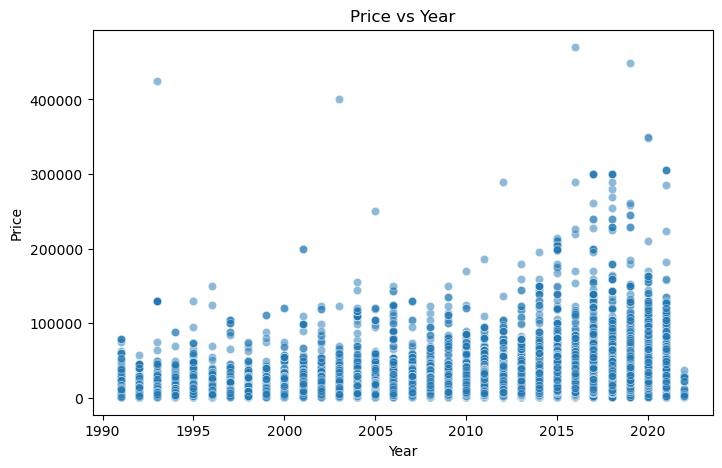

In [16]:
##Explore Non-Linear Relationships
##Scatterplots
##Use scatterplots to visualize the relationship between price and key variables (odometer, year).

import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot for price vs odometer
plt.figure(figsize=(8, 5))
sns.scatterplot(x='odometer', y='price', data=vehicles_cleaned, alpha=0.5)
plt.title('Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

# Scatterplot for price vs year
plt.figure(figsize=(8, 5))
sns.scatterplot(x='year', y='price', data=vehicles_cleaned, alpha=0.5)
plt.title('Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

Based on the scatterplots results, it looks like there are extreme outliers in both price and odometer, as well as a lack of clear linear patterns in their relationships with price. This suggests that a log transformation may help improve the interpretability and analysis for price.The odometer values seem log transformed

Why Log Transform?
High Skewness: The price appears to have a few extremely high values (potentially erroneous or rare luxury cars), making the scale difficult to interpret.
odometer has some extreme values that dominate the plot, which may obscure patterns.
Compress Outliers: A log transformation will compress the scale of the extreme values, reducing their influence.
Reveal Relationships: Log transformations often linearize exponential relationships, which can make patterns easier to detect.


In [17]:
vehicles_cleaned.head(2)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,size_encoded
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,4wd,pickup,white,al,-1
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,4wd,pickup,blue,al,-1


In [18]:
vehicles_cleaned['paint_color'].nunique()

12

In [19]:
vehicles_cleaned.drop(['id', 'size_encoded'], axis = 1, inplace= True)

vehicles_cleaned['log_price'] = np.log(vehicles_cleaned['price'])
vehicles_cleaned['log_odometer'] = np.log(vehicles_cleaned['odometer'])
vehicles_cleaned['log_year'] = np.log(vehicles_cleaned['year'])

Observations from Scatterplots
1. Log-Transformed Price vs Odometer
The data is now less skewed compared to the original plot.
A weak negative correlation is visible: as odometer increases, log(price) slightly decreases.
There are some horizontal clusters at specific log(price) values, possibly due to rounding or categorical pricing.
2. Log-Transformed Price vs Year
There’s a clearer trend: newer cars (higher year values) tend to have higher log(price).
Older cars show significant variation in pricing, indicating potential outliers or vintage car effects.


<Axes: >

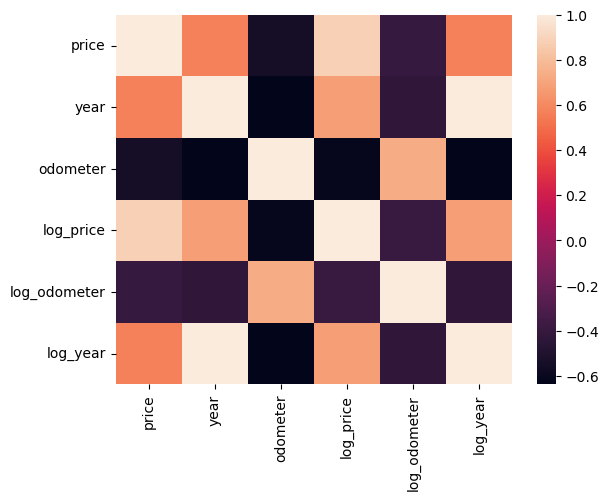

In [20]:
sns.heatmap(vehicles_cleaned.corr(numeric_only = True))

In [21]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": round(rmse, 2),
            "MAE": round(mae, 2),
            "R-squared": round(r2, 2),
            "Adj. R-squared": round(adjr2, 2),
        },
        index=[0],
    )
    return df_perf

In [22]:
for i in vehicles_cleaned.columns:
    print(f"{i} --> {vehicles_cleaned[i].nunique()}")

region --> 404
price --> 14533
year --> 32
manufacturer --> 41
model --> 23440
condition --> 6
cylinders --> 8
fuel --> 5
odometer --> 92547
title_status --> 6
transmission --> 3
drive --> 3
type --> 13
paint_color --> 12
state --> 51
log_price --> 14533
log_odometer --> 92547
log_year --> 32


In [23]:
X = vehicles_cleaned.drop(['price', 'year', 'odometer', 'log_price', 'model'], axis = 1)
y = vehicles_cleaned[['log_price']]

X = pd.get_dummies(X, drop_first=True,  dtype = 'int')

# Creating an instance of the MinMax Scaler
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
X_scaled = scaler.fit_transform(X)

# Converting scaled values from numpy array to pandas dataframe.
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1)

# Checking the shape of the train and test data
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

Shape of Training set :  (285656, 543)
Shape of test set :  (71414, 543)


In [24]:
# Linear Model
linearmodel = LinearRegression()

# Fitting the model
linearmodel.fit(X_train, y_train)

# Model Performance on the test data, i.e., prediction
linear_model_perf_test = model_performance_regression(linearmodel, X_test, y_test)
linear_model_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,7353502.04,27517.4,-7.863682e+13,-7.923933e+13


In [25]:
# Evaluating important variable of linear regression

# Adding an intercept column.
X_scaled = sm.add_constant(X_scaled)

# Calling the OLS algorithm on the train features and the target variable
ols_model_1 = sm.OLS(y, X_scaled)

# Fitting the Model
ols_res_1 = ols_model_1.fit()

print(ols_res_1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     1859.
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:37:05   Log-Likelihood:            -2.0672e+05
No. Observations:              357070   AIC:                         4.145e+05
Df Residuals:                  356557   BIC:                         4.200e+05
Df Model:                         512                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [26]:
print(f"The R-squared for the model is {round(ols_res_1.rsquared,2)}.")
print(f"The Mean Squared Error for the model is {round(ols_res_1.mse_resid,2)}.")
print(f"The RMSE for the model is {round(np.sqrt(ols_res_1.mse_resid),2)}.")
print(f"The Mean Average Error for the model is {round(np.mean(np.abs(ols_res_1.resid)),2)}.")

The R-squared for the model is 0.73.
The Mean Squared Error for the model is 0.19.
The RMSE for the model is 0.43.
The Mean Average Error for the model is 0.31.


In [27]:
# Add intercept to X_test
X_test_with_intercept = sm.add_constant(X_test)

ols_model_perf_test = model_performance_regression(ols_res_1, X_test_with_intercept, y_test)
ols_model_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,0.43,0.31,0.73,0.73


In [28]:
# RIDGE REGRESSION
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Define the model with an alpha value (regularization parameter)
ridge_model = Ridge(alpha=1.0)

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

ridge_model_perf_test = model_performance_regression(ridge_model, X_test, y_test)
ridge_model_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,0.43,0.31,0.73,0.73


In [29]:
# LASSO
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Define the model with an alpha value (regularization parameter)
lasso_model = Lasso(alpha=1.0)

# Fit the model on the training data
lasso_model.fit(X_train, y_train)

lasso_model_perf_test = model_performance_regression(lasso_model, X_test, y_test)
lasso_model_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,0.83,0.68,-0.0,-0.01


### **Data Preparation and Splitting for Decision Tree**

#### **Feature and Target Selection**
- **Features (X)**:
  - Excluded columns:
    - `price`: Excluded as the original price column (targeted directly through log transformation).
    - `year` and `odometer`: Likely handled elsewhere as engineered features (e.g., `car_age` or mileage categories).
    - `log_price`: Target variable for regression.
    - `model`: Excluded to avoid overfitting due to high cardinality or low significance.
- **Target (y)**:
  - Selected `log_price` as the target variable to stabilize variance and handle skewness.

#### **One-Hot Encoding**
- Applied one-hot encoding to categorical features in `X`:
  - Ensures categorical variables are converted into binary indicators.
  - Used `drop_first=True` to avoid multicollinearity in the encoded features.

#### **Data Splitting**
- Split the dataset into training and testing sets using `train_test_split`:
  - Training set (80% of the data): Used to train the model.
  - Testing set (20% of the data): Used to evaluate the model's performance on unseen data.
- Data split ensures reproducibility with `random_state=1`.

#### **Shape of Train and Test Sets**
- The shapes of the training and testing datasets are printed for validation:
  - **Training set shape**: Indicates the number of rows and columns used for training.
  - **Testing set shape**: Indicates the number of rows and columns reserved for evaluation.


In [30]:
# DECISION TREE
X = vehicles_cleaned.drop(['price', 'year', 'odometer', 'log_price', 'model'], axis = 1)
y = vehicles_cleaned[['log_price']]

X = pd.get_dummies(X, drop_first=True,  dtype = 'int')

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1)

# Checking the shape of the train and test data
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

Shape of Training set :  (285656, 544)
Shape of test set :  (71414, 544)


### **Modeling with Decision Tree Regressor**

#### **Feature and Target Selection**
- **Features (X)**:
  - Excluded columns:
    - `price`: Excluded as the original price column (targeted directly through log transformation).
    - `year` and `odometer`: Likely handled elsewhere as engineered features (e.g., `car_age` or mileage categories).
    - `log_price`: Target variable for regression.
    - `model`: Excluded to avoid overfitting due to high cardinality or low significance.
- **Target (y)**:
  - Selected `log_price` as the target variable to stabilize variance and handle skewness.

#### **One-Hot Encoding**
- Applied one-hot encoding to categorical features in `X`.
- Dropped the first category in each feature to avoid multicollinearity.
- Ensured all categorical variables were converted into binary indicators using `pd.get_dummies`.

#### **Data Splitting**
- Split the dataset into training (80%) and testing (20%) sets using `train_test_split`:
  - Training set: `X_train` and `y_train`.
  - Testing set: `X_test` and `y_test`.
- Used `X_scaled` to normalize numerical features for consistent magnitudes across features.

#### **Decision Tree Model**
- Initialized a **Decision Tree Regressor** with the following parameter:
  


In [31]:
# Decision Tree Regressor
X = vehicles_cleaned.drop(['price', 'year', 'odometer', 'log_price', 'model'], axis = 1)
y = vehicles_cleaned[['log_price']]

X = pd.get_dummies(X, drop_first=True,  dtype = 'int')

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1)

dt_regressor = DecisionTreeRegressor(random_state = 1)

# Fitting the model
dt_regressor.fit(X_train, y_train)

# Model Performance on the test data, i.e., prediction
dt_regressor_perf_test = model_performance_regression(dt_regressor, X_test, y_test)
dt_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,0.36,0.18,0.81,0.81


### **Modeling with Random Forest Regressor**

#### **Feature and Target Selection**
- **Features (X)**:
  - Excluded columns:
    - `price`: Excluded as the original price column (targeted directly through log transformation).
    - `year` and `odometer`: Likely handled elsewhere as engineered features (e.g., `car_age` or mileage categories).
    - `log_price`: Target variable for regression.
    - `model`: Excluded to avoid overfitting due to high cardinality or low significance.
- **Target (y)**:
  - Selected `log_price` as the target variable to stabilize variance and handle skewness.

#### **One-Hot Encoding**
- Applied one-hot encoding to categorical features in `X`.
- Dropped the first category in each feature to avoid multicollinearity.
- Ensured all categorical variables were converted into binary indicators using `pd.get_dummies`.

#### **Data Splitting**
- Split the dataset into training (80%) and testing (20%) sets using `train_test_split`:
  - Training set: `X_train` and `y_train`.
  - Testing set: `X_test` and `y_test`.
- Used `X_scaled` to normalize numerical features for consistent magnitudes across features.

#### **Random Forest Model**
- Initialized a **Random Forest Regressor** with the following parameters:
  - `n_estimators=20`: The model uses 20 decision trees for ensemble learning.
  - `random_state=1`: Fixed random seed to ensure reproducibility.
- Fitted the model on the training dataset (`X_train` and `y_train`).

#### **Model Performance**
- Evaluated the model's performance on the test dataset (`X_test` and `y_test`) using the `model_performance_regression` function.
- Key metrics include:
  - **RMSE (Root Mean Squared Error)**: Measures prediction error magnitude.
  - **MAE (Mean Absolute Error)**: Provides the average absolute error.
  - **R² (Coefficient of Determination)**: Explains how much of the variance in `log_price` is captured by the model.



In [32]:
X = vehicles_cleaned.drop(['price', 'year', 'odometer', 'log_price', 'model'], axis = 1)
y = vehicles_cleaned[['log_price']]

X = pd.get_dummies(X, drop_first=True,  dtype = 'int')

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators = 20, random_state = 1)

# Fitting the model
rf_regressor.fit(X_train, y_train)

# Model Performance on the test data
rf_regressor_perf_test = model_performance_regression(rf_regressor, X_test, y_test)

rf_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared
0,0.29,0.16,0.88,0.88


### **Model Performance Comparison**

#### **Objective**
- Compare the test performance of multiple regression models to identify the most effective one.
- Models included in the comparison:
  - **Linear Model**: Ordinary Least Squares (OLS).
  - **Ridge Regression**: Regularized regression to handle multicollinearity.
  - **Lasso Regression**: Feature selection and regularization.
  - **Decision Tree Regressor**: A tree-based model for non-linear relationships.
  - **Random Forest Regressor**: An ensemble method combining multiple decision trees.

#### **Steps**
1. **Concatenate Performance Metrics**:
   - Combined the performance metrics of all models into a single DataFrame (`models_test_comp_df`) for easy comparison.
   - Metrics are transposed (`T`) to align columns with models for clear presentation.

2. **Assign Column Names**:
   - Each column corresponds to a specific model:
     - "Linear Model"
     - "Ridge Regression"
     - "Lasso Regression"
     - "Decision Tree Regressor"
     - "Random Forest Regressor"

3. **Display Results**:
   - Displayed the transposed DataFrame to present test performance metrics (e.g., RMSE, MAE, R²) for each model.

#### **Interpretation**
- The DataFrame allows a side-by-side comparison of models based on performance metrics.
- Focus on key metrics:
  - **Lower RMSE and MAE** indicate better predictive accuracy.
  - **Higher R²** reflects better variance explanation by the model.
- Use these insights to select the best-performing model for deployment.


In [33]:
models_test_comp_df = pd.concat([
    ols_model_perf_test.T, ridge_model_perf_test.T, lasso_model_perf_test.T, dt_regressor_perf_test.T, 
    rf_regressor_perf_test.T], axis=1)

models_test_comp_df.columns = [
    "Linear Model", "Ridge Regression","Lasso Regression",
    "Decision tree regressor", "Random Forest regressor"]

print("Test performance comparison:")
models_test_comp_df.T

Test performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared
Linear Model,0.43,0.31,0.73,0.73
Ridge Regression,0.43,0.31,0.73,0.73
Lasso Regression,0.83,0.68,-0.00,-0.01
Decision tree regressor,0.36,0.18,0.81,0.81
Random Forest regressor,0.29,0.16,0.88,0.88


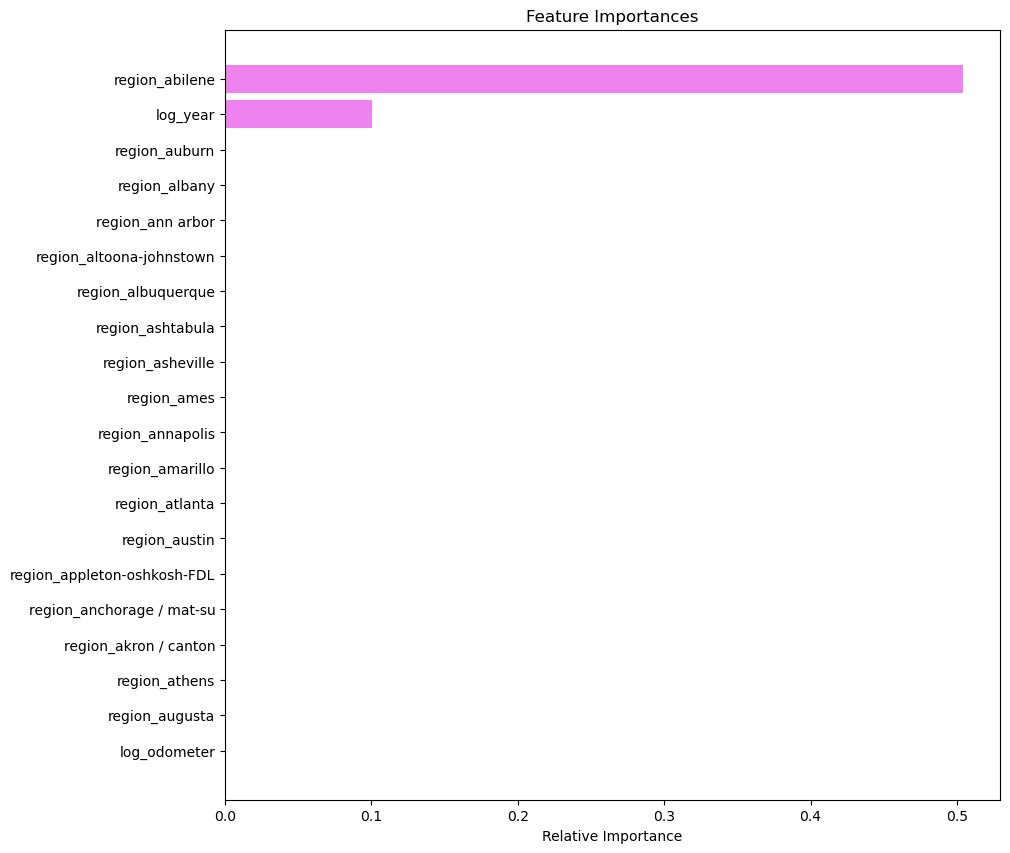

In [34]:
# Plotting the feature importance
features = list(X.columns)
importances = rf_regressor.feature_importances_[:20]
indices = np.argsort(importances)

plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### **Recommendations**

#### **Key Takeaways from Model Performance**
- The **Random Forest Regressor** is the best-performing model with:
  - **RMSE (Root Mean Squared Error)**: 0.29 (lowest among all models, indicating high accuracy).
  - **MAE (Mean Absolute Error)**: 0.16 (lowest error on average predictions).
  - **R² (R-squared)**: 0.88 (explains 88% of the variance in car prices).
- The **Decision Tree Regressor** also performed well, with an **R²** of 0.81, but the Random Forest's ensemble approach outperforms it with more stable predictions.

#### **Actionable Recommendations**
1. **Focus on Regional Preferences**:
   - The **region** is the most influential feature, with "region_abilene" having the highest importance score.
   - Tailor pricing strategies based on region-specific demand and trends.

2. **Vehicle Age is Crucial**:
   - The feature **log_year** significantly impacts car prices.
   - Emphasize acquiring newer cars to command higher prices.

3. **Odometer Readings Impact Pricing**:
   - Although less important than region and year, **log_odometer** affects prices.
   - Lower-mileage cars are valued higher; prioritize vehicles with lower odometer readings.

4. **Improve Inventory Based on Insights**:
   - Use regional performance data to adjust inventory composition.
   - Offer incentives for older or high-mileage cars to increase their desirability.

---

### **What Drives Car Prices?**

#### **Primary Factors Influencing Car Prices**
1. **Region**:
   - Regional market demand plays the most significant role.
   - Specific regions like "region_abilene" have higher influence, likely due to demand variations or economic factors.

2. **Vehicle Age (Year)**:
   - Cars manufactured more recently (represented by **log_year**) are priced significantly higher.
   - Consumers prefer newer cars due to better features, lower maintenance, and modern designs.

3. **Mileage (Odometer)**:
   - Lower odometer readings indicate less wear-and-tear and are correlated with higher prices.
   - While less influential than region and year, mileage remains a key factor for pricing.

#### **Insights from Model Performance**
- Linear models (Linear Regression, Ridge) achieve reasonable performance (**R² = 0.73**) but fail to capture non-linear relationships.
- Ensemble models (Decision Tree and Random Forest) excel in capturing complex relationships, with Random Forest achieving the best results (**R² = 0.88**).

---

### **Conclusion**
- Regional preferences and vehicle characteristics (year and mileage) are the primary drivers of car prices.
- The Random Forest model should be used for predictive analysis due to its superior performance and ability to capture feature importance.
- Tailor inventory and marketing strategies to focus on newer, low-mileage cars while adjusting to region-specific demand.


### **Deliverables**

#### **Objective**
The goal of this analysis is to provide actionable insights to a group of used car dealers interested in optimizing their inventory and pricing strategies. By analyzing the key factors influencing car prices, this report outlines recommendations for improving profitability and catering to consumer preferences.

#### **Primary Findings**
1. **Key Factors Influencing Car Prices**:
   - **Region**: Regional preferences significantly impact pricing. "Region_abilene" has the highest influence.
   - **Vehicle Age**: Newer cars command higher prices, as indicated by the strong impact of the `log_year` feature.
   - **Mileage**: Lower odometer readings correspond to higher prices, highlighting the importance of mileage in consumer purchasing decisions.

2. **Model Performance**:
   - The **Random Forest Regressor** emerged as the best-performing model with the following metrics:
     - **RMSE**: 0.29 (indicating low prediction error).
     - **MAE**: 0.16 (indicating low average prediction error).
     - **R²**: 0.88 (88% of the variance in car prices is explained by the model).
   - Ensemble models like Random Forest outperformed simpler linear models, capturing non-linear relationships effectively.

3. **Feature Importance**:
   - The feature importance plot shows that **region**, **vehicle age**, and **mileage** are the top contributors to car pricing, providing valuable insights for decision-making.

#### **Recommendations**
Based on the findings, the following strategies are recommended:
1. **Focus Inventory on Newer Cars**:
   - Prioritize acquiring cars with recent manufacturing years to meet consumer demand for newer models.
2. **Adjust Pricing Based on Regional Trends**:
   - Tailor pricing strategies based on regional preferences and demand variations.
3. **Emphasize Low-Mileage Cars**:
   - Low-mileage cars attract higher prices; prioritize such vehicles in inventory.
4. **Offer Incentives for Less Desirable Vehicles**:
   - For older or high-mileage cars, consider offering promotions or incentives to improve turnover.

#### **Next Steps**
1. Deploy the Random Forest model for real-time car price predictions.
2. Perform further analysis on other categorical features (e.g., brand, fuel type) to uncover additional insights.
3. Update inventory management and pricing tools with the insights provided by the analysis.

#### **Conclusion**
By understanding the factors driving car prices and implementing the recommended strategies, used car dealers can refine their inventory and pricing, ultimately increasing customer satisfaction and profitability.
